import libraries

In [31]:
from dtocs import *
from helper import *
from maps import *
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal, osr
from lazy import lazy
from gdal_interfaces import GDALTileInterface, GDALInterface


# Bounding box and path dataset filepath
- Add lat1,lon1 and lat2,lon2
- Change resolution
- Add dataset(.tif files) filepath (for GDAL interface (without tiling))

In [32]:
# USA random mountain
# lon1, lat1 = -109.83007049344715, 44.36470033197011
# lon2, lat2 = -109.7513685303535, 44.29673563882564

# India
# lon1, lat1 = 77.28112208857522,32.135432817449384
# lon2, lat2 = 77.62169826045022,31.94918029751246

# Colorado [Whole region]
# lon1, lat1 = -106.72643114729188,38.84785651131714
# lon2, lat2 = -105.95392348402243,39.458493653253676

# Colorado (peak to peak example)
# lat1, lon1 = 38.94374018363843, -106.5759101561709
# lat2, lon2 = 39.04527792014898, -106.38578062842298

# manali
# 
# 

lat1, lon1 = 32.372571, 76.983637
lat2, lon2 = 32.189737, 77.315875
resolution = 90
elevation_dataset_file = "/Users/aakash/Desktop/MTP/open-elevation-mod/data/elevation_dataset.tif"
landcover_dataset_file = "/Users/aakash/Desktop/MTP/open-elevation-mod/landcover/landcover_dataset.tif"

files = ["/Users/aakash/Desktop/MTP/open-elevation-mod/data/download_data.tif","/Users/aakash/Desktop/MTP/open-elevation-mod/data/data_us.tif","/Users/aakash/Desktop/MTP/open-elevation-mod/data/elevation_dataset.tif","/Users/aakash/Desktop/MTP/MTP2/exp/elevation/himachal.tif"]



GDAL without tiling

In [ ]:
elevation_dataset = GDALInterface(files[3])
landcover_dataset = GDALInterface(landcover_dataset_file)

elevation_map, landcover_map = getGrayLevelMatrixFromDataSet(lon1, lat1, lon2, lat2, elevation_dataset, landcover_dataset, resolution)

# Setup Data folder and GDAL Interface parameter with tiling)
- dirpath: path to the directory where datasets subfolder is stored
- elevation_path: path to folder containing elevation tiles
- landcover_path: path to folder containing landcover tiles

In [34]:
dirpath = "/Users/aakash/Desktop/MTP2/exp/"

elevation_path = dirpath + "elevation"
landcover_path = dirpath + "landcover"
elevation_summary_path = elevation_path + "/elevation_summary.json"
landcover_summary_path = landcover_path + "/landcover_summary.json"

ALWAYS_REBUILD_SUMMARY = True
OPEN_INTERFACES_SIZE = 8

Setup GDAL Tile Interface

In [35]:
elevation_data_interface = GDALTileInterface(elevation_path, elevation_summary_path, OPEN_INTERFACES_SIZE)
landcover_data_interface = GDALTileInterface(landcover_path, landcover_summary_path, OPEN_INTERFACES_SIZE)

if elevation_data_interface.has_summary_json() and not ALWAYS_REBUILD_SUMMARY:
    print('Re-using existing summary JSON')
    elevation_data_interface.read_summary_json()
else:
    print('Creating summary JSON ...')
    elevation_data_interface.create_summary_json()
    
if landcover_data_interface.has_summary_json() and not ALWAYS_REBUILD_SUMMARY:
    print('Re-using existing summary JSON')
    landcover_data_interface.read_summary_json()
else:
    print('Creating summary JSON ...')
    landcover_data_interface.create_summary_json()

Creating summary JSON ...
Processing /Users/aakash/Desktop/MTP2/exp/elevation/data_us.tif ... (0.1508769989013672 MB)
	Done! LAT (44.296689407195544,44.364736789967594) | LNG (-109.83026167928175,-109.75120993427923)
Processing /Users/aakash/Desktop/MTP2/exp/elevation/elevation_dataset.tif ... (11.907275199890137 MB)
	Done! LAT (38.84777838831176,39.458722613041445) | LNG (-106.72644762535619,-105.95380664948499)
Processing /Users/aakash/Desktop/MTP2/exp/elevation/himachal.tif ... (214.9501428604126 MB)
	Done! LAT (30.392116281951523,33.21561105146759) | LNG (75.0756775530935,79.36010246917314)
Processing /Users/aakash/Desktop/MTP2/exp/elevation/download_data.tif ... (0.5404443740844727 MB)
	Done! LAT (30.22997037316796,33.535770618727796) | LNG (74.91478928570768,80.08908532223613)
Building spatial index ...
Creating summary JSON ...
Processing /Users/aakash/Desktop/MTP2/exp/landcover/landcover_dataset.tif ... (0.8857107162475586 MB)
	Done! LAT (38.84779921124366,39.458743435973346) |

# Elevation matrix using Open-Elevation API

In [8]:
elevation_map, landcover_map = getGrayLevelMatrix(lon1, lat1, lon2, lat2, resolution)

start:  39.04527792014898 -106.5759101561709
end:  38.94374018363843 -106.38578062842298
shape:  377 548


# Generate Matrix Using GDAL tile interface

In [36]:
elevation_map, landcover_map = getGrayLevelMatrixFromDataSet(lon1, lat1, lon2, lat2, elevation_data_interface, landcover_data_interface, resolution)

start:  32.372571 76.983637
end:  32.189737 77.315875
shape:  226 347


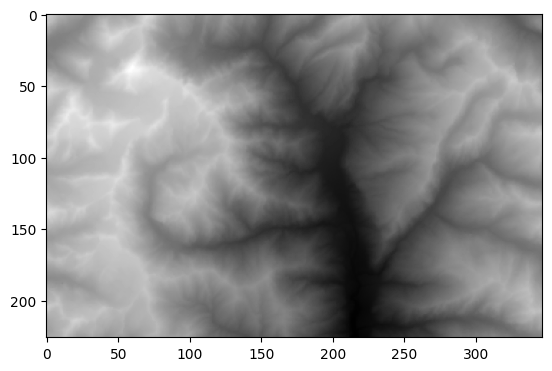

In [37]:
plt.imshow(elevation_map,cmap='gray')
plt.show()

In [38]:
print("Elevation Map Info")
print(f"Gray Map Shape: {elevation_map.shape}")
print(f"Min: {elevation_map.min()}")
print(f"Max: {elevation_map.max()}")

Elevation Map Info
Gray Map Shape: (226, 347)
Min: 1670
Max: 5864


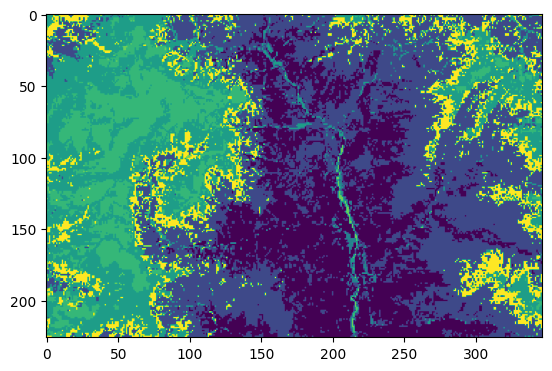

In [39]:
plt.imshow(landcover_map)
plt.show()

Source and Destination

In [73]:
n,m = elevation_map.shape

# USA random
# src_lon,src_lat = -109.81884898177093,44.32480359458633
# des_lon,des_lat = -109.77537406272984,44.30294042398075

# src_lat, src_lon = 38.98065379328955, -106.528761396495
# des_lat, des_lon = 39.02089538747208, -106.42163602957328

src_lat, src_lon = 32.243724, 77.204016
# src_lat, src_lon = 32.350336, 77.129226
des_lat, des_lon = 32.341876, 77.040854

src_latIdx,src_lonIdx = findIndex(src_lat,src_lon, lat1,lon1, lat2,lon2, resolution)
des_latIdx,des_lonIdx = findIndex(des_lat,des_lon, lat1,lon1, lat2,lon2, resolution)

Dijkstra

In [74]:
# from dijkstra import dijkstraFromSrc, dijkstraFromSrcWithLC, showPathDijkstra
from dijkstra import dijkstraFromSrc, showPathDijkstra

In [75]:
alpha = 0
# distFromSrc, parentMat  = dijkstraFromSrc(elevation_map, src_latIdx, src_lonIdx, resolution)
distFromSrc, parentMat  = dijkstraFromSrc(elevation_map, landcover_map, src_latIdx, src_lonIdx, res = resolution, h_weight = 0.001)

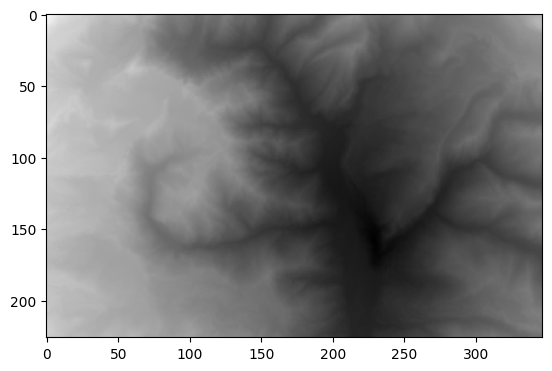

In [76]:
plt.imshow(distFromSrc,cmap='gray')
plt.show()

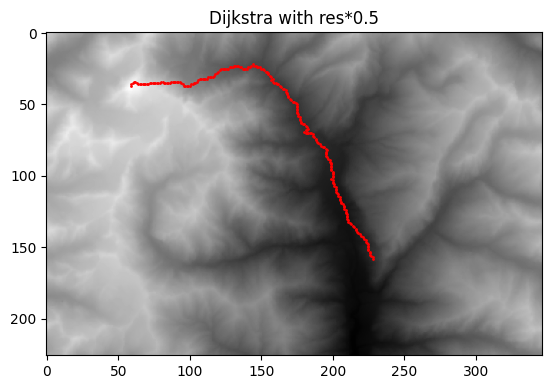

In [77]:
# elevation_map_copy=deepcopy(elevation_map)
showPathDijkstra(elevation_map, parentMat, src_latIdx, src_lonIdx, des_latIdx, des_lonIdx,h_weight = 0.5)

DTOCS Single Image

In [66]:
bin_map_start = initBinMap(src_latIdx, src_lonIdx, n, m)   
bin_map_end = initBinMap(des_latIdx, des_lonIdx, n, m)

In [67]:
accuracy = 0.0001
alpha = 0
parentMat = applyDistTfSingleSource(elevation_map, landcover_map, bin_map_start, accuracy, alpha)

Applying Distance transform single image......
Number of Passes for convergence: 25
Done!


In [78]:
showPathDTCOS(elevation_map, parentMat, src_latIdx, src_lonIdx, des_latIdx, des_lonIdx)

NameError: name 'showPathDTCOS' is not defined